# Graphing Patches

In [1]:
from lib.tools import *
from lib.stamp import *
from lib.inject import *
from lib.butler import *
from lib.visual import *
import lsst.geom as geom
from lsst.daf.butler import Butler, Timespan
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import Table, vstack
%matplotlib inline
import lsst.afw.display as afwDisplay
from lsst.source.injection import generate_injection_catalog


In [2]:
butler = Butler("dp1", collections="LSSTComCam/DP1")

visit_detector_region gives us just one detector, each visit is unique and we don't have duplicates

In [3]:
band = 'r'
ra = 53.076
dec = -28.11
query = "band.name = :band AND \
    visit_detector_region.region OVERLAPS POINT(:ra, :dec)"
bind = {"band": band, "ra": ra, "dec": dec}
dataset_refs = butler.query_datasets("visit_image",
                                     where=query,
                                     order_by=["visit.timespan.begin"],
                                     bind=bind)

visit.region can tell us all 9 detectors with the same exposure

In [102]:
band = 'r'
ra = 53.076
dec = -28.11
visit_idx = 1
query = "band.name = :band AND \
    visit.region OVERLAPS POINT(:ra, :dec)"
bind = {"band": band, "ra": ra, "dec": dec}
dataset_refs = butler.query_datasets("visit_image",
                                     where=query,
                                     order_by=["visit.timespan.begin"],
                                     bind=bind)

In [90]:
band = 'r'
ra = 53.076
dec = -28.11
visit_idx = 1
query = "band.name = :band AND \
    patch.region OVERLAPS POINT(:ra, :dec)"
bind = {"band": band, "ra": ra, "dec": dec}
dataset_patch = butler.query_datasets("template_coadd",
                                     where=query,
                                     bind=bind)

In [104]:
template = butler.get(dataset_patch[0])

In [115]:
dir(template)

['Factory',
 '__add__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '_get',
 '_pybind11_conduit_v1_',
 '_set',
 'apCorrMap',
 'clone',
 'containsSkyCoords',
 'convertD',
 'convertF',
 'convex_polygon',
 'detector',
 'dtype',
 'filter',
 'getBBox',
 'getConvexPolygon',
 'getCutout',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPhotoCalib',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 

In [126]:
#template.getInfo().getMetadata()

In [131]:
import lsst.skymap
findPatch(lsst.geom.SpherePoint(ra=50,dec=20))

NameError: name 'TractInfo' is not defined

In [78]:
for d in dataset_refs:
    if d.dataId.get('visit') == dataset_refs[visit_idx].dataId.get('visit'):
        print(d.dataId)

{instrument: 'LSSTComCam', detector: 4, visit: 2024110800247, band: 'r', day_obs: 20241108, physical_filter: 'r_03'}


In [79]:
visit = dataset_refs[visit_idx]

In [80]:
visit.dataId

{instrument: 'LSSTComCam', detector: 4, visit: 2024110800247, band: 'r', day_obs: 20241108, physical_filter: 'r_03'}

In [81]:
visit_img = butler.get(visit)

In [11]:
dir(visit_img.image)

['Factory',
 '__add__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '_get',
 '_pybind11_conduit_v1_',
 '_set',
 'array',
 'assign',
 'clone',
 'convertD',
 'convertDouble',
 'convertF',
 'convertFloat',
 'convertI',
 'convertL',
 'convertU',
 'dtype',
 'getArray',
 'getBBox',
 'getDimensions',
 'getHeight',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'indexToPosition',
 'positionToIndex',
 'readFits',
 'readFitsWithOptions',
 'scaledDivides',
 'scaledMinus',
 'scaledMultiplies',

In [12]:
#dir(visit_img)

In [13]:
type(visit_img.metadata)

lsst.daf.base.PropertyList

In [14]:
visit_img.visitInfo.boresightRaDec.getDec().asDegrees()

-28.0723466054328

In [15]:
#dir(visit_img.visitInfo.getBoresightRaDec())

In [16]:
def pixel_to_degrees(n):
    return 0.2 * n / 3600

In [157]:
import numpy as np

wcs = template.getWcs()

patch_bbox = template.getBBox()

patch_xmin = patch_bbox.getMinX()
patch_ymin = patch_bbox.getMinY()
patch_height = pixel_to_degrees(template.height)
patch_width = pixel_to_degrees(template.width)

#wcs = deep_coadd.wcs
#print(dir(wcs))

#print(deep_coadd.getBBox().getMin())
wcs.pixelToSky(patch_xmin, patch_ymin) #.getRa().asDegrees()
patch_ra_dec_min = wcs.pixelToSky(patch_xmin, patch_ymin) #.getRa().asDegrees()
patch_ra_min = patch_ra_dec_min.getRa().asDegrees()
patch_dec_min = patch_ra_dec_min.getDec().asDegrees()
patch_width = patch_width / np.cos(np.deg2rad(patch_dec_min))
#print(ra_dec_min) 
print(patch_ra_min, patch_dec_min, patch_height, patch_width)

53.28919793043086 -28.198204013567192 0.18888888888888888 0.2143253993165245


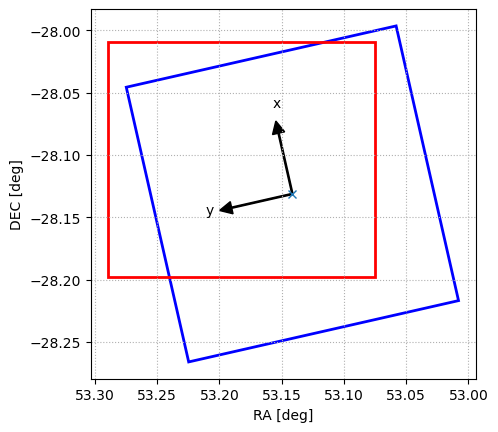

In [158]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

ra = visit_img.visitInfo.boresightRaDec.getRa().asDegrees()
dec = visit_img.visitInfo.boresightRaDec.getDec().asDegrees()

bbox = visit_img.getBBox()

# Rectangle parameters
center = (ra, dec)        # (x, y)
width = pixel_to_degrees(bbox.getMaxX())              # Length along x-axis before rotation
height = pixel_to_degrees(bbox.getMaxY())             # Length along y-axis before rotation
angle = visit_img.visitInfo.boresightRotAngle.asDegrees()             # Degrees counter-clockwise

# Convert center to bottom-left corner, accounting for rotation
# The Rectangle class expects the lower-left corner
# So we just specify center as the anchor point for simplicity using transform

# Create figure and axes
fig, ax = plt.subplots()
ax.plot([ra],[dec], 'x')
# Create rectangle
rect = patches.Rectangle(
    (center[0] - width / 2, center[1] - height / 2),  # lower-left corner
    width,
    height,
    angle=-angle,
    rotation_point = 'center',
    linewidth=2,
    edgecolor='blue',
    facecolor='none'
)

patch_rect = patches.Rectangle(
    (patch_ra_min, patch_dec_min),  # lower-left corner
    -patch_width,
    patch_height,
    angle=0,
    rotation_point = 'center',
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)

plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")

# Add rectangle to plot
ax.add_patch(rect)
ax.add_patch(patch_rect)

ax.invert_xaxis()

theta_rad = np.deg2rad(-angle)

dx = 0.05 * np.cos(theta_rad)
dy = 0.05 * np.sin(theta_rad)

plt.arrow(ra, dec, -dx, -dy,
          head_width=0.01, head_length=0.01, fc='black', ec='black')# Set axis limits and aspect
plt.arrow(ra, dec, -dy, dx,
          head_width=0.01, head_length=0.01, fc='black', ec='black')# Set axis limits and aspect

plt.annotate('x', xy=(ra - dx/0.7, dec - dy/0.7))
plt.annotate('y', xy=(ra-dy/0.7,dec+dx/0.7))
#ax.set_xlim(0, 10000)
#ax.set_ylim(0, 10000)
ax.set_aspect('equal')

plt.grid(ls=':')

In [18]:
print(center)

(53.3274246636802, -28.0723466054328)


In [19]:
visit_img.visitInfo.getBoresightRotAngle().asDegrees()

102.79934100531

In [82]:
afwDisplay.setDefaultBackend('firefly')
afw_display = afwDisplay.Display(frame=1)

In [116]:
afw_display.mtv(template)

In [117]:
afw_display.setMaskTransparency(100)

Setting Mask Transparency to 0 shows many colors.
- Yellow: The most saturated parts that exceed an assigned maximum. The Green areas surrounding are the edge-detected bodies drawn around these high points
- Green: Saturated Stars
- Cyan: Cross-talk between amplifiers - When yellow areas have these overflowed electrons, there is a high signal that creates signal interference that spikes at regular intervals on the sides of where they are read.
  - There are 8 amplifiers
- Dark Blue: Detected Sources
- Green Lines: Defects in the CCD

The vertical "bleed trails" come from the incoming electrons overflowing into other pixels, they are vertical due to the physical design of the detector

In [23]:
visit_wcs = visit_img.getWcs()

In [24]:
#dir(visit_wcs)

In [25]:
visit2_wcs = butler.get(dataset_refs[1]).getWcs()
visit_wcs.getRelativeRotationToWcs(visit2_wcs)

Angle(0.090420935441901773, degrees)

In [26]:
visit_wcs.getSkyOrigin()

SpherePoint(53.32742466368016*degrees, -28.072346605432806*degrees)

In [27]:
visit_wcs.getPixelScale()

Angle(5.5673719047969401e-05, degrees)

In [28]:
visit_wcs.getTransform()

lsst.afw.geom.TransformPoint2ToSpherePoint[2->2]

In [29]:
visit_wcs.pixelToSky(x=12., y=13.)

SpherePoint(52.9138818007846*degrees, -28.046739835197236*degrees)

In [30]:
#visit_wcs.linearizePixelToSky(x=12., y=13.)

In [31]:
visit_wcs.skyToPixelArray(ra=53,dec=-28)

ValueError: vsplit only works on arrays of 2 or more dimensions

In [32]:
visit_wcs.getCdMatrix()

array([[ 1.24379035e-05,  5.42678324e-05],
       [ 5.42700607e-05, -1.24172118e-05]])

The matrix gives the transformation from pixels to ra,dec in degrees: 
> New system coords = position * (cdmatrix containing deltax and deltay) + "origin coordinate"

In [33]:
for i in range(20):
    afw_display.dot("o", 1844, 970, size=500, ctype="red")

getFitsMetadata() gives information about any distortions resolved in the final image
- CRPIX: Coordinate Reference Pixel
- CRVAL: Ra(CRVAL1),Dec(CRVAL2) for the origin
- CD1/2_1/2: Elements of the matrix
- A_X_Y: Should be small numbers informing of distortions

In [34]:
#visit_wcs.getFitsMetadata()

In [35]:
visit_img.getInfo().getVisitInfo().boresightRotAngle.asDegrees()

102.79934100531

In [36]:
visit_img.getInfo().getVisitInfo()

VisitInfo(exposureTime=30, darkTime=30.4398, date=2024-11-09T06:13:26.028993809, UT1=nan, ERA=2.4749 rad, boresightRaDec=(53.3274246637, -28.0723466054), boresightAzAlt=(273.9478839205, +74.4073000880), boresightAirmass=1.03814, boresightRotAngle=1.79419 rad, rotType=1, observatory=-30.2446N, -70.7494E  2663, weather=Weather(14.375, 74135, 17.05), instrumentLabel='LSSTComCam', id=2024110800246, focusZ=2.07136, observationType='science', scienceProgram='PP-SURVEY', observationReason='science', object='slew_icrs', hasSimulatedContent=false)